<a href="https://colab.research.google.com/github/Deleon57/EDAR-REGRESSION/blob/main/PRE_PRO_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import yfinance as yf
import pandas as pd
import numpy as np

In [27]:
ticker = "GFI.JO"
data = yf.download(ticker, start="2012-12-27", end="2024-12-31")

data.reset_index(inplace=True)
data.head(10)


/tmp/ipython-input-2989764289.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2012-12-27", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GFI.JO,GFI.JO,GFI.JO,GFI.JO,GFI.JO
0,2012-12-27,8964.020508,9007.836884,8828.187891,8874.634360,586494
1,2012-12-28,9113.874023,9153.308862,8978.918096,9113.874023,1174556
2,2012-12-31,9091.963867,9151.554951,8999.072886,9104.232763,433476
3,2013-01-01,9091.963867,9091.963867,9091.963867,9091.963867,0
4,2013-01-02,9323.318359,9325.946504,9043.767691,9151.556707,2277190
5,2013-01-03,9335.583984,9376.772209,9183.978625,9289.138496,1638359
6,2013-01-04,9049.024414,9131.399905,8955.256723,9113.873744,2154183
7,2013-01-07,9104.234375,9156.813836,9000.826901,9083.202396,1833898
8,2013-01-08,8928.092773,9148.052382,8900.926828,9013.973126,2221997


In [29]:
# Drop the Volume column
data = data.drop(columns=["Volume"])

# Show first 10 rows to confirm
data.head(10)


/tmp/ipython-input-260186278.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = data.drop(columns=["Volume"])


Price,Date,Close,High,Low,Open
Ticker,,GFI.JO,GFI.JO,GFI.JO,GFI.JO
0,2012-12-27,8964.020508,9007.836884,8828.187891,8874.634360
1,2012-12-28,9113.874023,9153.308862,8978.918096,9113.874023
2,2012-12-31,9091.963867,9151.554951,8999.072886,9104.232763
3,2013-01-01,9091.963867,9091.963867,9091.963867,9091.963867
4,2013-01-02,9323.318359,9325.946504,9043.767691,9151.556707
5,2013-01-03,9335.583984,9376.772209,9183.978625,9289.138496
6,2013-01-04,9049.024414,9131.399905,8955.256723,9113.873744
7,2013-01-07,9104.234375,9156.813836,9000.826901,9083.202396
8,2013-01-08,8928.092773,9148.052382,8900.926828,9013.973126


In [31]:
# Save dataset to CSV
data.to_csv("GFI_dataset.csv")

# Stationary making

## Dataset not Stationary

In [10]:
from statsmodels.tsa.stattools import adfuller

# Loop through each feature
for col in ["Close", "High", "Low", "Open", "Volume"]:
    result = adfuller(data[col].dropna())
    print(f"Feature: {col}")
    print("  ADF Statistic:", result[0])
    print("  p-value:", result[1])
    print("-" * 40)


Feature: Close
  ADF Statistic: -0.8933107108820656
  p-value: 0.790167313835849
----------------------------------------
Feature: High
  ADF Statistic: -1.131498256195196
  p-value: 0.7023487449658418
----------------------------------------
Feature: Low
  ADF Statistic: -1.0129300173000566
  p-value: 0.7485192097233496
----------------------------------------
Feature: Open
  ADF Statistic: -1.0936717214420837
  p-value: 0.7175889401568951
----------------------------------------
Feature: Volume
  ADF Statistic: -11.332112159559976
  p-value: 1.1062108832357393e-20
----------------------------------------


In [11]:
# Make stationary
data["Close_pct"] = data["Close"].pct_change()





In [12]:
import numpy as np

# Apply log returns transformation to all features
for col in ["Close", "High", "Low", "Open", "Volume"]:
    data[f"{col}_log_return"] = np.log(data[col] / data[col].shift(1))


# Show first 10 rows
data.head(10)


Price,Date,Close,High,Low,Open,Volume,Close_pct,Close_log_return,High_log_return,Low_log_return,Open_log_return,Volume_log_return
Ticker,,GFI.JO,GFI.JO,GFI.JO,GFI.JO,GFI.JO,,,,,,
0,2012-12-27,8964.020508,9007.836884,8828.187891,8874.634360,586494.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-12-28,9113.874023,9153.308862,8978.918096,9113.874023,1174556.0,0.016717,0.016579,0.016020,0.016930,0.026601,0.694483
2,2012-12-31,9091.963867,9151.554951,8999.072886,9104.232763,433476.0,-0.002404,-0.002407,-0.000192,0.002242,-0.001058,-0.996809
3,2013-01-01,9091.963867,9091.963867,9091.963867,9091.963867,433476.0,0.000000,0.000000,-0.006533,0.010269,-0.001349,0.000000
4,2013-01-02,9323.318359,9325.946504,9043.767691,9151.556707,2277190.0,0.025446,0.025128,0.025410,-0.005315,0.006533,1.658861
5,2013-01-03,9335.583984,9376.772209,9183.978625,9289.138496,1638359.0,0.001316,0.001315,0.005435,0.015385,0.014922,-0.329247
6,2013-01-04,9049.024414,9131.399905,8955.256723,9113.873744,2154183.0,-0.030695,-0.031176,-0.026517,-0.025220,-0.019048,0.273716
7,2013-01-07,9104.234375,9156.813836,9000.826901,9083.202396,1833898.0,0.006101,0.006083,0.002779,0.005076,-0.003371,-0.160968
8,2013-01-08,8928.092773,9148.052382,8900.926828,9013.973126,2221997.0,-0.019347,-0.019537,-0.000957,-0.011161,-0.007651,0.191963


ADF Test for Close_log_return:
  Test Statistic: -40.24756827794925
  p-value: 0.0
  Critical Values: {'1%': np.float64(-3.432498660339858), '5%': np.float64(-2.862489341541441), '10%': np.float64(-2.5672753585663295)}
  ✅ Reject null hypothesis — data is STATIONARY
--------------------------------------------------
ADF Test for High_log_return:
  Test Statistic: -39.85429216264493
  p-value: 0.0
  Critical Values: {'1%': np.float64(-3.432498660339858), '5%': np.float64(-2.862489341541441), '10%': np.float64(-2.5672753585663295)}
  ✅ Reject null hypothesis — data is STATIONARY
--------------------------------------------------
ADF Test for Low_log_return:
  Test Statistic: -13.622580565651953
  p-value: 1.7849632192924804e-25
  Critical Values: {'1%': np.float64(-3.4325085900132772), '5%': np.float64(-2.862493727174628), '10%': np.float64(-2.5672776934205763)}
  ✅ Reject null hypothesis — data is STATIONARY
--------------------------------------------------
ADF Test for Open_log_return

Text(0.5, 1.0, 'Log Returns of Close')

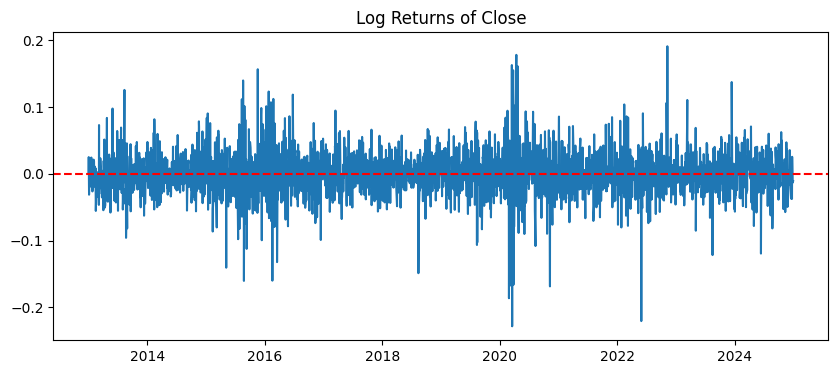

In [19]:
#from statsmodels.tsa.stattools import adfuller
#import matplotlib.pyplot as plt

# Function to run Augmented Dickey-Fuller (ADF) Test
#def check_stationarity(series, name="Series"):
#    result = adfuller(series.dropna())  # drop NaNs created by shift(1)
#    print(f"ADF Test for {name}:")
#    print(f"  Test Statistic: {result[0]}")
#    print(f"  p-value: {result[1]}")
#    print(f"  Critical Values: {result[4]}")
#    if result[1] <= 0.05:
#        print("  ✅ Reject null hypothesis — data is STATIONARY")
#    else:
#        print("  ❌ Fail to reject null hypothesis — data is NOT stationary")
#    print("-" * 50)

# Run stationarity check for all log return columns
#for col in ["Close_log_return", "High_log_return", "Low_log_return", "Open_log_return", "Volume_log_return"]:
#    check_stationarity(data[col], name=col)

# Optional: Plot one series to visually confirm mean/reverting behavior
#plt.figure(figsize=(10,4))
#plt.plot(data["Close_log_return"], label="Close_log_return")
#plt.axhline(0, color="red", linestyle="--")
#plt.title("Log Returns of Close")
#plt.legend()
#plt.show()


In [13]:
# Drop the original non-stationary columns
data = data.drop(columns=["Close", "High", "Low", "Open", "Volume"])

# Show first 10 rows of the cleaned dataset
data.head(10)


/tmp/ipython-input-1768238182.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = data.drop(columns=["Close", "High", "Low", "Open", "Volume"])


Price,Date,Close_log_return,High_log_return,Low_log_return,Open_log_return,Volume_log_return
Ticker,,,,,,
0,2012-12-31,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,0.000000,-0.006533,0.010269,-0.001349,0.000000
2,2013-01-02,0.025127,0.025409,-0.005316,0.006533,1.658861
3,2013-01-03,0.001315,0.005436,0.015385,0.014922,-0.329247
4,2013-01-04,-0.031177,-0.026517,-0.025220,-0.019048,0.273716
5,2013-01-07,0.006083,0.002779,0.005076,-0.003371,-0.160968
6,2013-01-08,-0.019537,-0.000957,-0.011161,-0.007651,0.191963
7,2013-01-09,0.008795,-0.012144,-0.004539,0.000777,0.053811
8,2013-01-10,0.009394,0.005994,0.005130,-0.004283,-0.404434


In [14]:
# Make sure Date is in datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Set Date as index
data = data.set_index("Date")

# Show first 10 rows
data.head(10)


Price,Close_log_return,High_log_return,Low_log_return,Open_log_return,Volume_log_return
Ticker,,,,,
Date,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN
2013-01-01,0.000000,-0.006533,0.010269,-0.001349,0.000000
2013-01-02,0.025127,0.025409,-0.005316,0.006533,1.658861
2013-01-03,0.001315,0.005436,0.015385,0.014922,-0.329247
2013-01-04,-0.031177,-0.026517,-0.025220,-0.019048,0.273716
2013-01-07,0.006083,0.002779,0.005076,-0.003371,-0.160968
2013-01-08,-0.019537,-0.000957,-0.011161,-0.007651,0.191963
2013-01-09,0.008795,-0.012144,-0.004539,0.000777,0.053811


In [15]:
# Save dataset to CSV
data.to_csv("stationary_dataset.csv")


In [31]:
# Reset index so Date becomes a column
data = data.reset_index()

# Remove the multi-index levels (Price, Ticker)
data.columns = data.columns.droplevel(0)  # drop "Price" level

# Rename "Date" properly
data = data.rename(columns={"Date": "date"})

# Quick check
print(data.head())


Ticker                                                             
0      2013-01-02  0.025127  0.025409 -0.005315  0.006533       inf
1      2013-01-03  0.001315  0.005435  0.015385  0.014922 -0.329247
2      2013-01-04 -0.031176 -0.026517 -0.025220 -0.019048  0.273716
3      2013-01-07  0.006083  0.002779  0.005076 -0.003371 -0.160968
4      2013-01-08 -0.019537 -0.000957 -0.011161 -0.007651  0.191963


In [32]:
# Reset index so 'Date' is a normal column
data = data.reset_index(drop=True)

# Assign proper column names
data.columns = ["date", "Close_log_return", "High_log_return", "Low_log_return",
                "Open_log_return", "Volume_log_return"]

# Quick check
print(data.head())


        date  Close_log_return  High_log_return  Low_log_return  \
0 2013-01-02          0.025127         0.025409       -0.005315   
1 2013-01-03          0.001315         0.005435        0.015385   
2 2013-01-04         -0.031176        -0.026517       -0.025220   
3 2013-01-07          0.006083         0.002779        0.005076   
4 2013-01-08         -0.019537        -0.000957       -0.011161   

   Open_log_return  Volume_log_return  
0         0.006533                inf  
1         0.014922          -0.329247  
2        -0.019048           0.273716  
3        -0.003371          -0.160968  
4        -0.007651           0.191963  


In [33]:
# Save cleaned dataset to CSV
data.to_csv("cleaned_stationary_dataset.csv", index=False)
